# Diabetes Prediction

## Requirted Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from sklearn.inspection import plot_partial_dependence
#from sklearn.metrics import classification_report, recall_score, plot_confusion_matrix, plot_precision_recall_curve, roc_curve
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
#import matplotlib as mlp
#from matplotlib import Artist
#from matplotlib.artist import Artist
#import seaborn as sns
import warnings
import optuna
from optuna.samplers import TPESampler
from tqdm import tqdm
from pycaret.classification import *

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
data = pd.read_csv('Diabetes.csv')
data

PR   GL  BP  ST   IN   BMI    DPF  AG  DB
0      6  148  72  35    0  33.6  0.627  50   1
1      1   85  66  29    0  26.6  0.351  31   0
2      8  183  64   0    0  23.3  0.672  32   1
3      1   89  66  23   94  28.1  0.167  21   0
4      0  137  40  35  168  43.1  2.288  33   1
...   ..  ...  ..  ..  ...   ...    ...  ..  ..
2299  10  101  76  48  180  32.9  0.171  63   0
2300   2  122  70  27    0  36.8  0.340  27   0
2301   5  121  72  23  112  26.2  0.245  30   0
2302   1  126  60   0    0  30.1  0.349  47   1
2303   1   93  70  31    0  30.4  0.315  23   0

[2304 rows x 9 columns]

In [5]:
data.columns

Index(['PR', 'GL', 'BP', 'ST', 'IN', 'BMI', 'DPF', 'AG', 'DB'], dtype='object')

In [6]:
data.shape

(2304, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PR      2304 non-null   int64  
 1   GL      2304 non-null   int64  
 2   BP      2304 non-null   int64  
 3   ST      2304 non-null   int64  
 4   IN      2304 non-null   int64  
 5   BMI     2304 non-null   float64
 6   DPF     2304 non-null   float64
 7   AG      2304 non-null   int64  
 8   DB      2304 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 162.1 KB


In [8]:
# label_encoder = preprocessing.LabelEncoder()
# data['EB']= label_encoder.fit_transform(data['EB'])

# data['EB'].unique()

In [10]:
# # Label Encoding

# # Sex Column
# sex_mapping = {'Female': 0, 'Male': 1,'Other': 2}
# data['GD'] = data['GD'].map(sex_mapping)

# # Smoking Histroy Column
# sh_mapping = {'No Info': 0, 'former': 1, 'never': 2, 'ever': 3, 'not current': 4, 'current': 5}
# data['SH'] = data['SH'].map(sh_mapping)

In [11]:
data.isnull().sum()

PR     0
GL     0
BP     0
ST     0
IN     0
BMI    0
DPF    0
AG     0
DB     0
dtype: int64

In [ ]:
cols =data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

# Data Preprocessing

<Axes: >

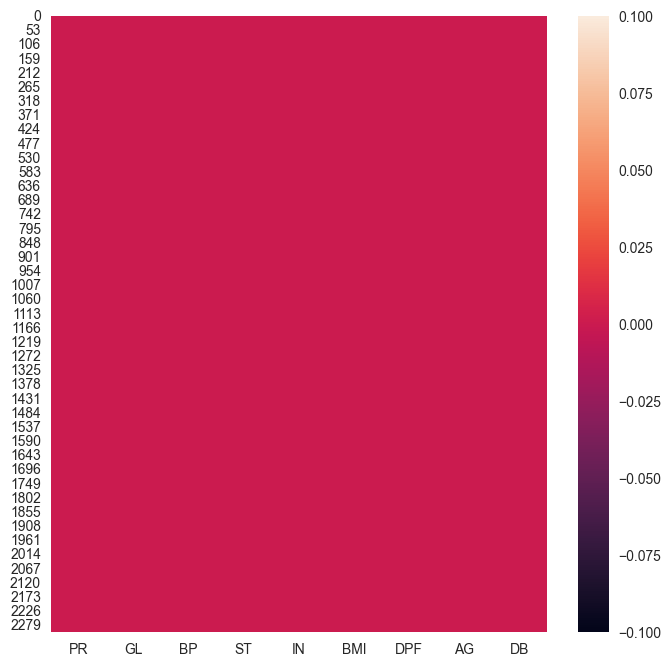

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

Steps so far:
1. Libraries Installation
2. Data Loading
3. Data Description
4. Data Preprocessing
    a) Checking null values
    b) Filling null values using the Mean method
    c) Label encoding categorical features
    d) Filling null values on the left out columns.

In [13]:
data.head()

PR   GL  BP  ST   IN   BMI    DPF  AG  DB
0   6  148  72  35    0  33.6  0.627  50   1
1   1   85  66  29    0  26.6  0.351  31   0
2   8  183  64   0    0  23.3  0.672  32   1
3   1   89  66  23   94  28.1  0.167  21   0
4   0  137  40  35  168  43.1  2.288  33   1

In [14]:
data.describe().T

count        mean         std     min       25%       50%        75%  \
PR   2304.0    3.845052    3.368115   0.000   1.00000    3.0000    6.00000   
GL   2304.0  120.894531   31.958732   0.000  99.00000  117.0000  140.25000   
BP   2304.0   69.105469   19.347401   0.000  62.00000   72.0000   80.00000   
ST   2304.0   20.536458   15.945289   0.000   0.00000   23.0000   32.00000   
IN   2304.0   79.799479  115.193951   0.000   0.00000   30.5000  127.25000   
BMI  2304.0   31.992578    7.880736   0.000  27.30000   32.0000   36.60000   
DPF  2304.0    0.471876    0.331185   0.078   0.24375    0.3725    0.62625   
AG   2304.0   33.240885   11.755124  21.000  24.00000   29.0000   41.00000   
DB   2304.0    0.348958    0.476744   0.000   0.00000    0.0000    1.00000   

        max  
PR    17.00  
GL   199.00  
BP   122.00  
ST    99.00  
IN   846.00  
BMI   67.10  
DPF    2.42  
AG    81.00  
DB     1.00

In [15]:
print(data['DB'].value_counts())

DB
0    1500
1     804
Name: count, dtype: int64


### Class Balancing

In [16]:
df_majority = data[data.DB==0]
df_minority = data[data.DB==1]
print(df_majority.shape)
print(df_minority.shape)

(1500, 9)
(804, 9)


In [19]:
df_manjority_downsampled = resample(df_majority,replace=True,n_samples=800,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.DB.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=1485,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.DB.value_counts())

Downsampled data:->
 DB
1    804
0    800
Name: count, dtype: int64
Upsampled data:->
 DB
0    1500
1    1485
Name: count, dtype: int64


In [20]:
df_upsampled.describe().T

count        mean         std     min      25%      50%      75%     max
PR   2985.0    4.130318    3.533652   0.000    1.000    3.000    7.000   17.00
GL   2985.0  125.565829   33.627530   0.000  102.000  123.000  147.000  199.00
BP   2985.0   69.315913   20.123022   0.000   64.000   72.000   80.000  122.00
ST   2985.0   20.945729   16.655366   0.000    0.000   23.000   33.000   99.00
IN   2985.0   81.096817  116.497585   0.000    0.000    0.000  130.000  846.00
BMI  2985.0   32.734975    7.674332   0.000   28.000   32.800   37.200   67.10
DPF  2985.0    0.488903    0.339909   0.078    0.245    0.394    0.654    2.42
AG   2985.0   34.263317   11.783643  21.000   25.000   31.000   42.000   81.00
DB   2985.0    0.497487    0.500077   0.000    0.000    0.000    1.000    1.00

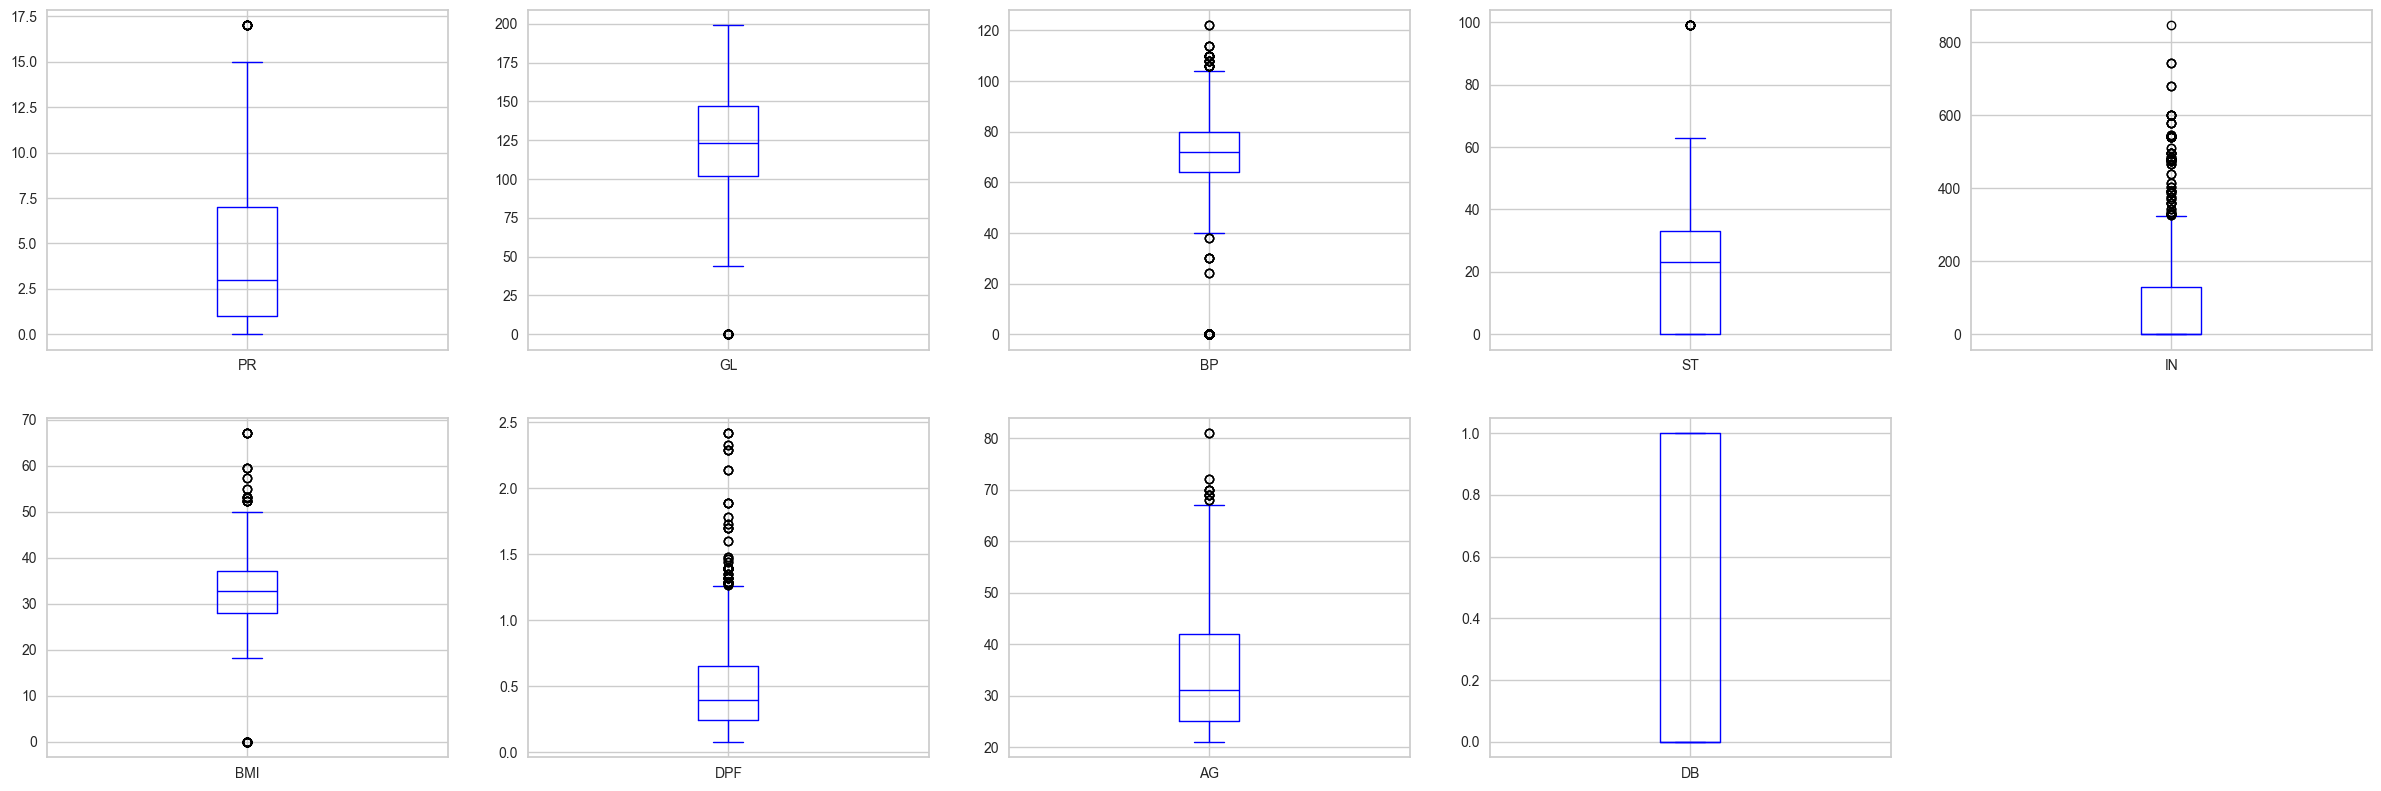

In [21]:
#boxplot
df_upsampled.plot(color = 'blue', kind='box', figsize=(30, 15), subplots=True, layout=(3,5))
plt.show()

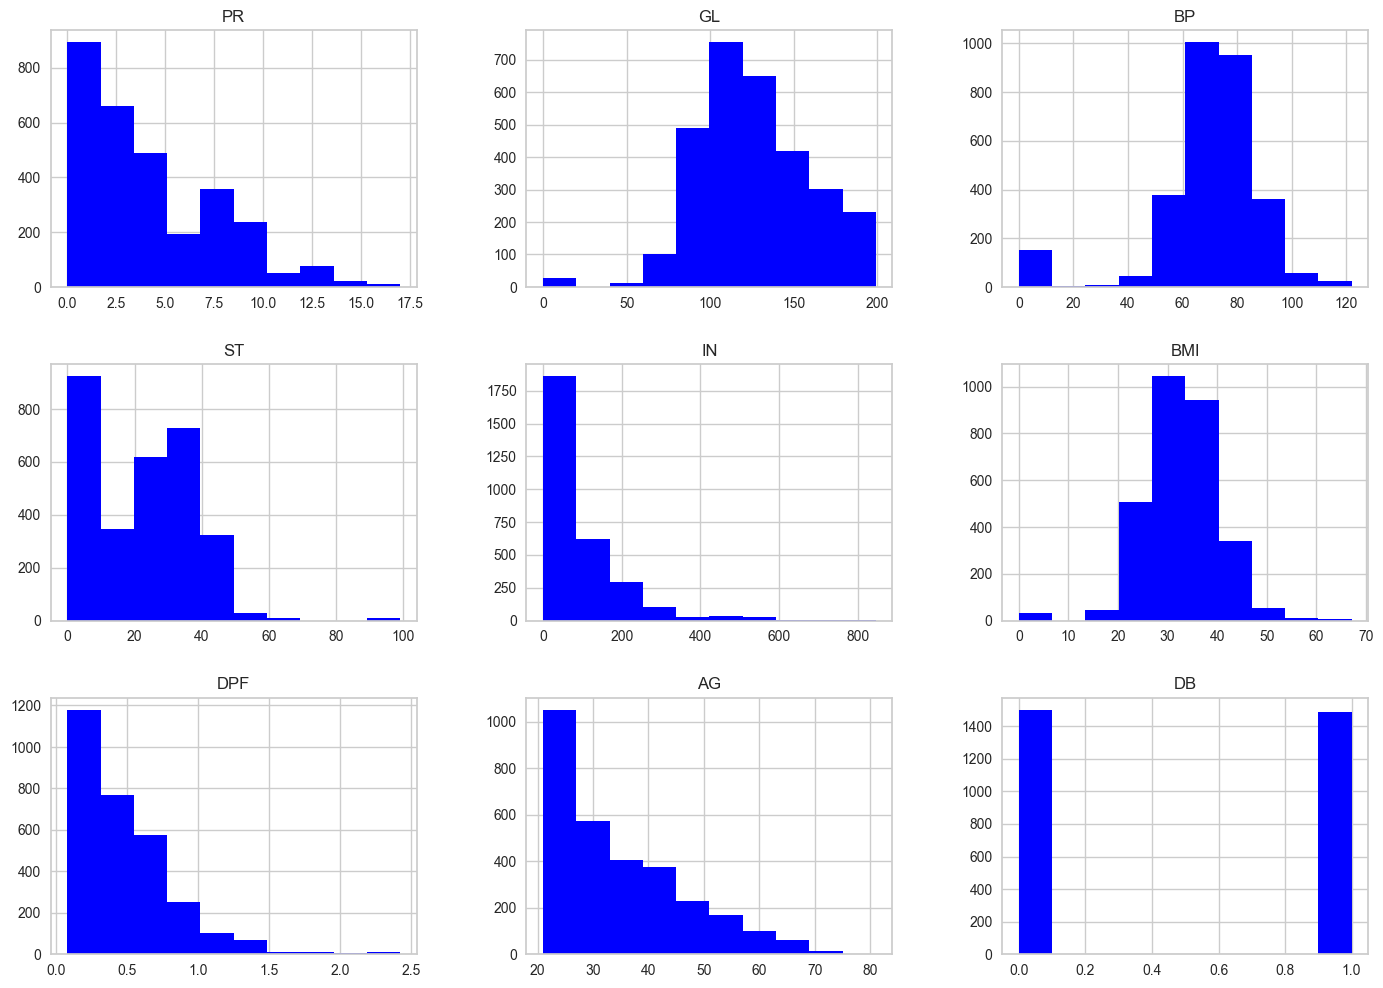

In [22]:
#histogram
df_upsampled.hist(color='blue',bins=10,figsize=(17,12))
plt.show()

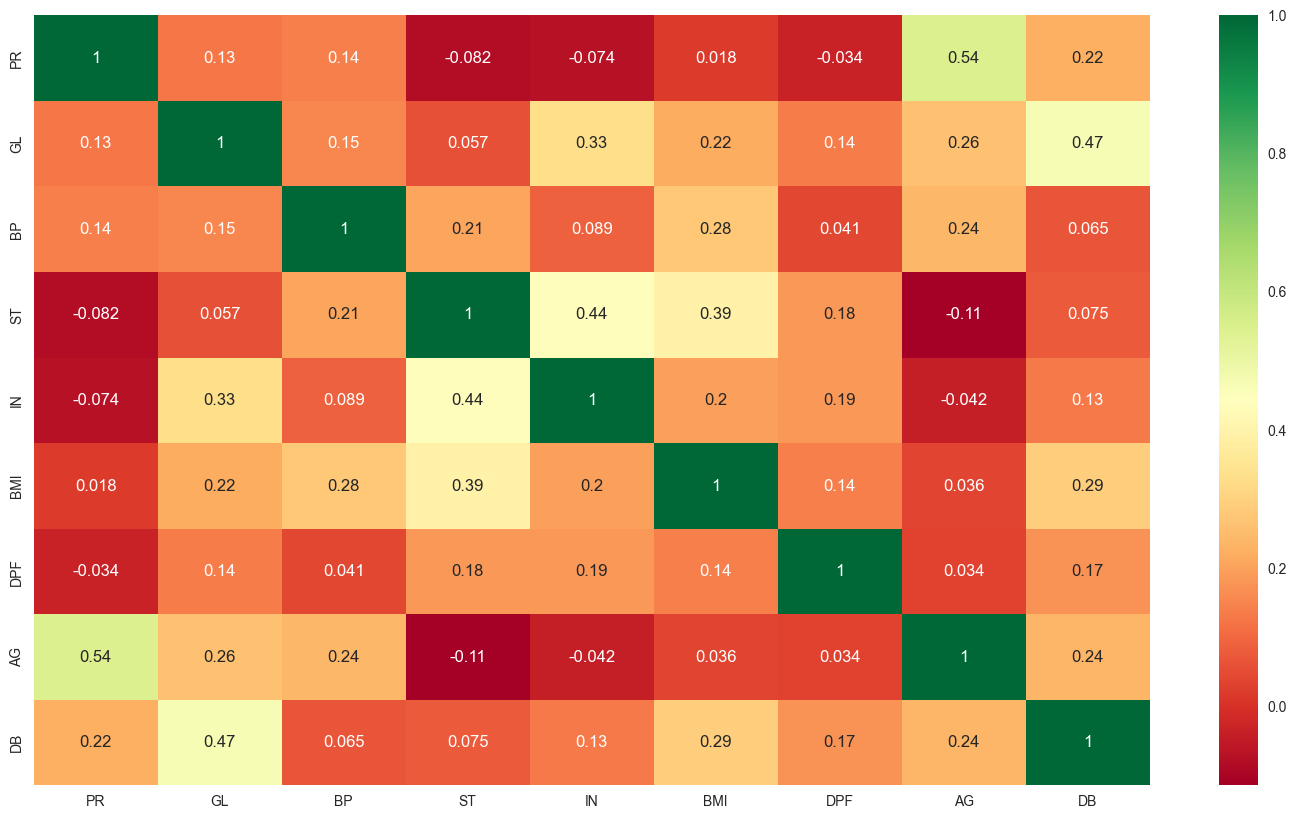

In [23]:
#get correlations of each features in dataset
corrmat = df_upsampled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical features
categorical_features = ['DB']

# Perform tests for each feature
for feature in categorical_features:
    # Chi-squared test
    contingency_table = pd.crosstab(df_upsampled[feature], df_upsampled['DB'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature} vs. DB:")
    print(f"  Chi2 Statistic: {chi2_stat:.3f}")
    print(f"  P-value: {p_value:.3f}")

    # Cramer's V (if association is significant)
    if p_value < 0.05:  # Adjust significance level as needed
        v = cramers_v(df_upsampled[feature], df_upsampled['DB'])
        print(f"  Cramer's V: {v:.3f}")
    print("-" * 30)  # Separator for clarity

Chi-squared test for DB vs. DB:
  Chi2 Statistic: 2981.001
  P-value: 0.000
  Cramer's V: 0.999
------------------------------


In [26]:
# IQR method for outlier detection and removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Usage for each column (excluding the target variable):
for col in df_upsampled.columns[:-1]:  # Iterate through all columns except the last one
    scaled_data = remove_outliers_iqr(df_upsampled, col)

# Display the data after removing outliers
print(df_upsampled.shape)
df_upsampled.head()

(2985, 9)


PR   GL  BP  ST  IN   BMI    DPF  AG  DB
1    1   85  66  29   0  26.6  0.351  31   0
3    1   89  66  23  94  28.1  0.167  21   0
5    5  116  74   0   0  25.6  0.201  30   0
7   10  115   0   0   0  35.3  0.134  29   0
10   4  110  92   0   0  37.6  0.191  30   0

## Pycaret

In [27]:
# new_data = df_upsampled.drop('seqn', axis=1)

In [28]:
from pycaret.classification import *
clf_setup = setup(data=df_upsampled,
                  target='DB',
                  session_id=42,
                  preprocess=True,
                  normalize=True,
                  transformation=True,
                  index=False,
                  verbose=True)

In [29]:
print('comparing models for metabolic syndrome data and selecting top 5 out of them based on accuracy score')
top_model = compare_models(n_select = 5, sort='Accuracy')

comparing models for metabolic syndrome data and selecting top 5 out of them based on accuracy score


# Model ensembles

<br>


### 1. K-Fold Cross Validation

Stratified K-Fold Cross Validation is a technique used for evaluating a model. It is particularly useful for classification problems in which the class labels are not evenly distributed i.e data is imbalanced. It is a enhanced version of K-Fold Cross Validation. Key difference is that it uses stratification which allows original distribution of each class to be maintained across each fold. It is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

**[Tip]** It is better to use `StratifiedKFold` when K-fold CV because it controls the percentage of each class of the target variable.  

<br>

<img 
     src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FluuGW%2FbtrgjGrj9g6%2FNOsrBEQIr2uTRynM2PZ3h1%2Fimg.png">
     
<br>


Source: https://scikit-learn.org/stable/modules/cross_validation.html, https://machinelearningmastery.com/k-fold-cross-validation/


<br><br>


### 2. Stacking

While bagging and boosting used homogenous weak learners for ensemble, Stacking often considers heterogeneous weak learners, learns them in parallel, and combines them by training a meta-learner to output a prediction based on the different weak learner’s predictions. A meta learner inputs the predictions as the features and the target being the ground truth values in data D(Fig 2.), it attempts to learn how to best combine the input predictions to make a better output prediction. 

A general approach for stacking is using meta model as Linear Regression (regression problem) or Logistic Regression (classification problem) to combine the predictions of the sub-models with any learning algorithm.

<br>

<img 
     src="https://editor.analyticsvidhya.com/uploads/39725Stacking.png">
     
<br>


source: https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

<br><br>

### Creating Meta Learners for Stacking

In [ ]:
meta_learner1 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = KNeighborsClassifier())# Define meta learner
meta_learner2 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = LinearDiscriminantAnalysis())# Define meta learner
meta_learner3 = stack_models(estimator_list = [et, rf, catboost, xgboost, lightgbm], meta_model = LogisticRegression())# Define meta learner

In [ ]:
evaluate_model(meta_learner1)
evaluate_model(meta_learner2)
evaluate_model(meta_learner3)

In [30]:
print("Top 5 Models are:")
for model in top_model:
  print(type(model).__name__)

Top 5 Models are:
ExtraTreesClassifier
DecisionTreeClassifier
RandomForestClassifier
LGBMClassifier
XGBClassifier


In [32]:
# Evaluate the stacker model
print(stacker)
evaluate_model(stacker)

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                      

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
# Finalize the stacker model
final_stacker = finalize_model(stacker)
final_stacker

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['PR', 'GL', 'BP', 'ST', 'IN',
                                             'BMI', 'DPF', 'AG'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(e...
                                                                         class_weight=None,
                                                                         criterion='gini',
                                                                         max_depth=None,
                                                                         max_features='sqrt',
                                                                         max_leaf_nodes=None,
                                                                         max_samples=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
                                                                         min_weight_fraction_leaf=0.0,
                                                                         n_estimators=100,
                                                                         n_jobs=None,
                                                                         oob_score=False,
                                                                         random_state=None,
                                                                         verbose=0,
                                                                         warm_start=False),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0))],
         verbose=False)

### RBM

In [63]:
stacking1 = stack_models(estimator_list = [svm, knn, dt, et, gbc, ada], meta_model = LogisticRegression(), fold=10, method='auto')

In [97]:
evaluate_model(stacking1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### BBM

In [31]:
# Create a stacked ensemble model
stacking2 = stack_models(estimator_list = [et, rf, dt, gbc, knn, ada], meta_model = LogisticRegression() fold=10, method='auto')

In [97]:
evaluate_model(stacking2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Implementing SHAP XAI Shapley Additive exPlanations

In [74]:
import shap
shap.initjs()

In [75]:
# Defining the Dependedent and the Independent Variable
X = data.drop('DB', axis=1)
y = data['DB']

In [76]:
# Instead of passing the pipeline object directly, pass a function
# that calls the pipeline's 'predict' method:

# Explain the model's predictions using SHAP values
# The lambda function creates a callable object that takes data as input and
# returns the predictions of the final_stacker pipeline's predict_proba method.
explainer = shap.Explainer(lambda x: final_stacker.predict_proba(x)[:,1], X)
shap_values = explainer(X)

ExactExplainer explainer: 2305it [24:31,  1.56it/s]                                                                    


In [77]:
np.shape(shap_values.values)

(2304, 8)

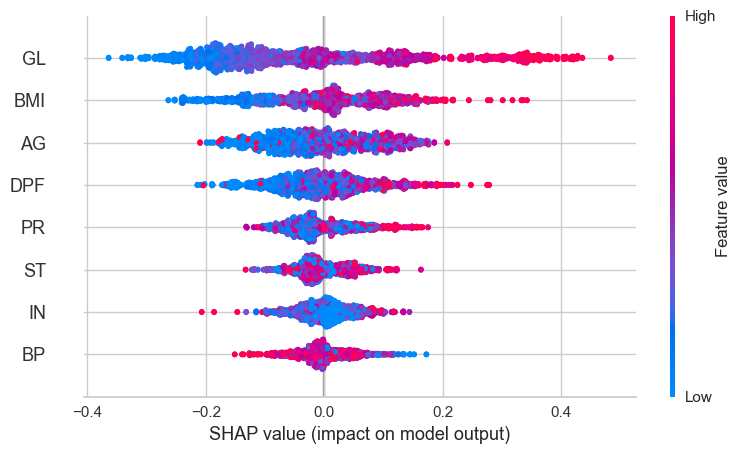

In [78]:
shap.summary_plot(shap_values, X)

In [79]:
shap.plots.force(shap_values[0])

In [80]:
shap.plots.force(shap_values[0:100])

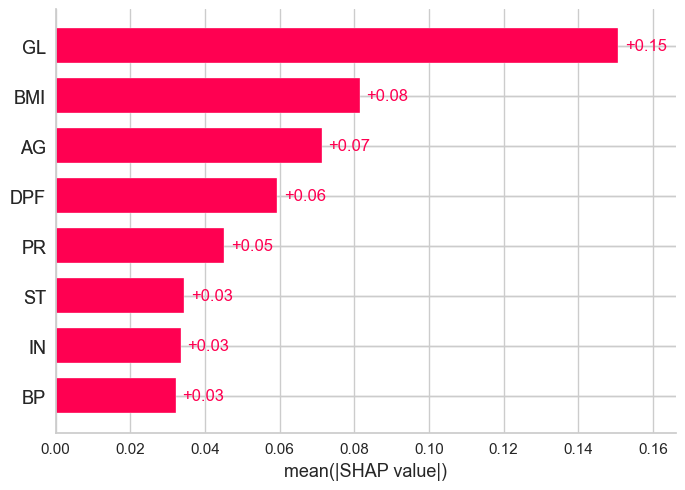

In [81]:
shap.plots.bar(shap_values, max_display=len(shap_values.feature_names))

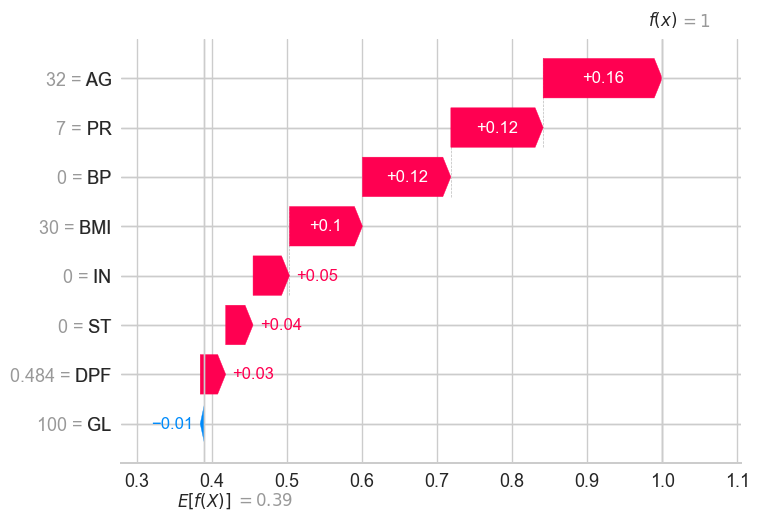

In [93]:
shap.plots.waterfall(shap_values[15], max_display=len(shap_values.feature_names))

## LIME Local  Interpretable Model-agnostic Explanations

In [83]:
#pip install lime

import lime
import lime.lime_tabular

In [84]:
# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,  # Use the NumPy array representation of X
    feature_names=X.columns.tolist(), # Feature names for interpretability
    class_names=['No DB', 'DB'], # Class names
    mode='classification' # or 'regression' depending on the task
)

In [85]:
# Choose an instance to explain
instance_index = 5 # Example: explain the first instance
instance = X.iloc[instance_index]

In [86]:
# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)), # Use a lambda function to wrap the prediction
    num_features=8  # Number of features to show in explanation
)

In [87]:
# Show the explanation
explanation.show_in_notebook(show_table=True)

In [88]:
explanation.as_list()

[('BMI <= 27.30', -0.19118817569008298),
 ('99.00 < GL <= 117.00', -0.10260135316645344),
 ('DPF <= 0.24', -0.0901522746129851),
 ('29.00 < AG <= 41.00', 0.0649108739579084),
 ('3.00 < PR <= 6.00', -0.013471657667157147),
 ('ST <= 0.00', -0.011252355327447042),
 ('IN <= 0.00', 0.0105702609297173),
 ('72.00 < BP <= 80.00', -0.0010925219140785316)]

In [89]:
# Choose another instance to explain
instance_index_2 = 15 # explain the 15th instance
instance_2 = X.iloc[instance_index_2]

# Explain the second instance
explanation_2 = explainer.explain_instance(
    instance_2.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features=8 # Number of features to show in explanation
)

# Show the second explanation
explanation_2.show_in_notebook(show_table=True)
explanation_2.as_list()

[('99.00 < GL <= 117.00', -0.09394446828102414),
 ('PR > 6.00', 0.07162207862754127),
 ('29.00 < AG <= 41.00', 0.05068258159928319),
 ('27.30 < BMI <= 32.00', 0.03130704921612245),
 ('0.37 < DPF <= 0.63', 0.028985225465587655),
 ('BP <= 62.00', 0.023117216379524366),
 ('ST <= 0.00', -0.005974429708758147),
 ('IN <= 0.00', -0.0025795049567322093)]

In [90]:
# Choose yet another instance to explain
instance_index_3 = 100 # Explain the 100th instance
instance_3 = X.iloc[instance_index_3]

# Explain the third instance
explanation_3 = explainer.explain_instance(
    instance_3.values,
    lambda x: final_stacker.predict_proba(pd.DataFrame(x, columns=X.columns)),
    num_features=8  # Number of features to show in explanation
)

# Show the third explanation
explanation_3.show_in_notebook(show_table=True)
explanation_3.as_list()

[('GL > 140.25', 0.3147228700272734),
 ('DPF > 0.63', 0.0990698057763335),
 ('BMI > 36.60', 0.09336104836568612),
 ('29.00 < AG <= 41.00', 0.06671466418779941),
 ('PR <= 1.00', -0.011878048771932905),
 ('62.00 < BP <= 72.00', -0.005480501911899709),
 ('ST <= 0.00', -0.005315713729535051),
 ('IN <= 0.00', 0.004615548957181384)]

# End